#**Problem Statement: Gradient Boosting and XGBoost**

Write  a  Python  program  that  reads  the gender_classification.csv(provided  on LMS)  file  into  a  DataFrame,  where  the  dataset  contains  data  of  different parameters measured on human face classified based on gender and gender is our  dependent  variable,  the  following  are  the  tasks  that  are  to  be  taken  into consideration  while  constructing  Gradient  Boosting  and  XGBoost  model,  to predict gender using given data and compare their accuracy.

1.Load the given dataset into a DataFrame

2.Find missing values and treat them

3.Observe distribution of target variable (‘gender’ is our target variable)

4.Do    standardization    on    continuous    data    'forehead_width_cm'    and 'forehead_height_cm'

5.Extract independent and dependent variables into the x and y DataFrames

6.Split your data into train and test by 30% as test size

7.Build a Gradient boosting classifier model and XGBoost model and compare their accuracy

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

**1.Load the given dataset into a DataFrame**

In [ ]:
df=pd.read_csv('/content/diy_dataset_zkf_vrc2l9o.zip')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female



**2.Find missing values and treat them**



In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


**3.Observe distribution of target variable (‘gender’ is our target variable)**


In [ ]:
target_ratio=pd.DataFrame({'Count' : df.gender.value_counts(), 'percentage' : df.gender.value_counts()/len(df) })
target_ratio

,Count,percentage
Female,2501,0.5001
Male,2500,0.4999


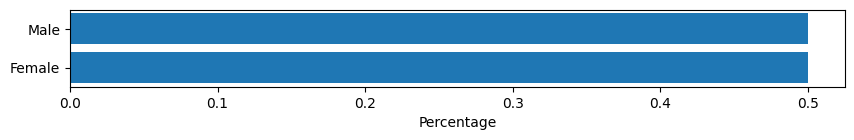

In [ ]:
plt.figure(figsize=(10,1))
plt.barh(target_ratio.index,target_ratio.percentage)
plt.xlabel('Percentage')
plt.show()


**4.Do    standardization    on    continuous    data    'forehead_width_cm'    and 'forehead_height_cm'**


In [ ]:
con = df[['forehead_width_cm','forehead_height_cm']]
cat = df[['long_hair','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long']]
x_std=StandardScaler()
arr=x_std.fit_transform(con)

In [ ]:
std_df=pd.DataFrame(data=arr, index=con.index, columns=con.columns)
std_df.head()

,forehead_width_cm,forehead_height_cm
0,-1.247933,0.283971
1,0.739389,-1.009418
2,-1.247933,0.653511
3,1.100720,0.283971
4,0.287725,-0.085568


In [ ]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   forehead_width_cm          5001 non-null   float64
 1   forehead_height_cm         5001 non-null   float64
 2   long_hair                  5001 non-null   int64  
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 273.6 KB


In [ ]:
ip=pd.concat([std_df,cat],axis=1)
ip.head()

,forehead_width_cm,forehead_height_cm,long_hair,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,-1.247933,0.283971,1,1,0,1,1
1,0.739389,-1.009418,0,0,0,1,0
2,-1.247933,0.653511,0,1,1,1,1
3,1.100720,0.283971,0,0,1,1,1
4,0.287725,-0.085568,1,0,0,0,0


In [ ]:
lb=LabelEncoder()
df.gender=lb.fit_transform(df.gender)


**5.Extract independent and dependent variables into the x and y DataFrames**


In [ ]:
x=ip.copy()
y=df.gender


**6.Split your data into train and test by 30% as test size**



In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=124,test_size=0.3)

**7.Build a Gradient boosting classifier model and XGBoost model and compare their accuracy**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_clf=GradientBoostingClassifier(learning_rate=0.5,n_estimators=1000)

In [ ]:
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=1000)

0.9673550966022652



Confusion matrix for GradientBoostingClassifier


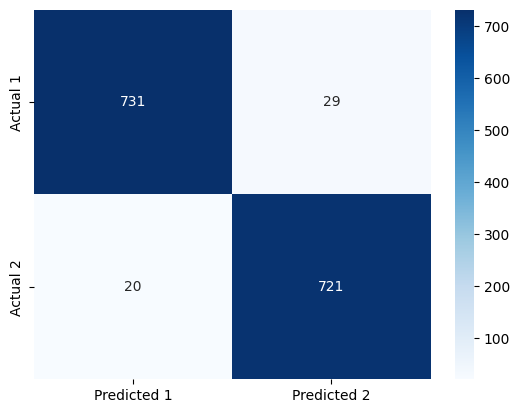



 Classification report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       760
           1       0.96      0.97      0.97       741

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [ ]:
gb_pred=gb_clf.predict(x_test)
print(metrics.accuracy_score(y_test,gb_pred))
print('\n\n')
print('Confusion matrix for GradientBoostingClassifier')
gb_cm=metrics.confusion_matrix(y_test, gb_pred)
lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]
sns.heatmap(gb_cm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()
print('\n\n Classification report')
print(metrics.classification_report(y_test,gb_pred))

In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
xgb_model=XGBClassifier(num_class = 2,
                           objective="multi:softprob",
                           eval_metric="mlogloss",
                           seed=42)

In [ ]:
y_test

2636    1
3501    1
4989    0
1318    0
3225    0
       ..
615     0
4162    1
2943    1
2981    1
599     0
Name: gender, Length: 1501, dtype: int64

In [ ]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=2, num_parallel_tree=None, ...)

In [ ]:
xgb_pred=xgb_model.predict(x_test)

In [ ]:
print(metrics.accuracy_score(y_test,xgb_pred))
print('\n\n')
print('Confusion matrix for  XG boost classifier')
xgboost_cm=metrics.confusion_matrix(y_test, xgb_pred)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(xgboost_cm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)

plt.show()

print('\n\n Classification report')
print(metrics.classification_report(y_test,xgb_pred))

ValueError: ignored

In [ ]:
print(metrics.accuracy_score(y_test,xgb_model_pred))
print('\n\n')
print('Confusion matrix for  XG boost classifier')
xgboost_cm=metrics.confusion_matrix(y_test, xgb_model_pred)
lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]


sns.heatmap(xgboost_cm,annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()
print('\n\n Classification report')

print(metrics.classification_report(y_test,xgb_model_pred))
("the result")

In [ ]:
predict_probabilities = xgb_model.predict_proba(x_test)
from sklearn.metrics import roc_auc_score
final_metric = roc_auc_score(y_test, predict_probabilities[:,1])
print (final_metric)

In [ ]:
xgb_gs_clf = XGBClassifier(num_class = 2,
                           objective="multi:softprob",
                           eval_metric="mlogloss",
                           seed=42)

param_grid = {"max_depth": [10,15,20],
              "n_estimators": range(5,20,5) ,
              "gamma": [0.03,0.05],
              "learning_rate": [0.01,0.05]}

grid_search = GridSearchCV(xgb_gs_clf,
                           param_grid=param_grid,
                           cv = 5,
                           n_jobs=-1,
                           scoring='neg_log_loss',
                           verbose=2)
grid_search.fit(x_train,y_train)
grid_search.best_params_

xgboost_y_pred=grid_search.predict(x_test)

In [ ]:
try:
  print(metrics.accuracy_score(y_test,xgboost_y_pred))
except ValueError :
  print('\n\nConfusion matrix for optimal XG boost classifier')

try:
  xgboost_cfm=metrics.confusion_matrix(y_test, xgboost_y_pred)
  lbl1=["Predicted 1", "Predicted 2"]
  lbl2=["Actual 1", "Actual 2"]
  sns.heatmap(xgboost_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
  plt.show()
except ValueError:
  print('\n\n\n Classification report')
try:
  print(metrics.classification_report(y_test,xgboost_y_pred))
except ValueError:
  print("the result :")

In [ ]:
predict_probabilities = grid_search.predict_proba(x_test)
final_metric = roc_auc_score(y_test, predict_probabilities[:,1])
print (final_metric)